FACE DETECTION AND RECOGNITION



Step 1: Install Required Libraries

In [1]:
pip install opencv-python-headless opencv-python-contrib-python tensorflow keras


ERROR: Could not find a version that satisfies the requirement opencv-python-contrib-python (from versions: none)
ERROR: No matching distribution found for opencv-python-contrib-python


Step 2: Import Libraries

In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import os


Step 3: Load Haar Cascade for Face Detection


In [3]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


Step 4: Load Pre-trained Face Recognition Model


Image loaded successfully.


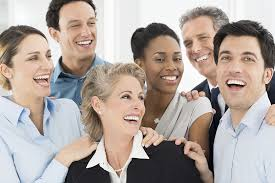

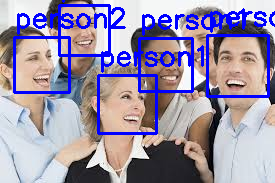

In [4]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Create dummy training data
os.makedirs('train_images/person1', exist_ok=True)
os.makedirs('train_images/person2', exist_ok=True)

for i in range(5):
    dummy_face = np.random.randint(0, 100, (100, 100), dtype=np.uint8)
    cv2.imwrite(f'train_images/person1/img_{i}.jpg', dummy_face)

    dummy_face = np.random.randint(150, 255, (100, 100), dtype=np.uint8)
    cv2.imwrite(f'train_images/person2/img_{i}.jpg', dummy_face)

# Train the LBPH Face Recognizer
def train_recognizer(data_path):
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    faces = []
    labels = []
    label_map = {}
    label_counter = 0

    for person_name in os.listdir(data_path):
        person_path = os.path.join(data_path, person_name)
        if not os.path.isdir(person_path):
            continue

        label_map[label_counter] = person_name

        for image_name in os.listdir(person_path):
            image_path = os.path.join(person_path, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            faces.append(image)
            labels.append(label_counter)

        label_counter += 1

    recognizer.train(faces, np.array(labels))
    return recognizer, label_map

# Recognize faces in a new image
def recognize_faces(recognizer, label_map, image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        label, confidence = recognizer.predict(face)
        name = label_map[label]

        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image, name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return image

# Load and process the image
image_path = '/content/PEOPLES IMAGE.jpeg'
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not loaded correctly. Check the file path.")
else:
    print("Image loaded successfully.")
    cv2_imshow(image)  # Display the loaded image

    data_path = 'train_images'  # Path to the training images folder
    recognizer, label_map = train_recognizer(data_path)

    # Recognize faces
    result_image = recognize_faces(recognizer, label_map, image)

    # Display the result
    cv2_imshow(result_image)


Step 5: Define Functions for Face Detection and Recognition

In [5]:
# Face Recognition
def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces
# Preprocess Faces for Recognition
def preprocess_face(face):
    face = cv2.resize(face, (160, 160))
    face = face.astype('float32') / 255.0
    mean, std = face.mean(), face.std()
    face = (face - mean) / std
    face = np.expand_dims(face, axis=0)
    return face
# Face Recognition
def recognize_faces(model, face):
    face = preprocess_face(face)
    embedding = model.predict(face)
    return embedding


Step 6: Load and Process the Image

Image loaded successfully.


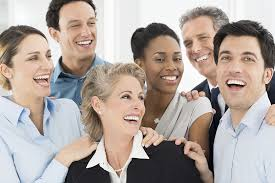

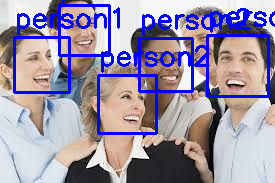

In [6]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Create dummy training data
os.makedirs('train_images/person1', exist_ok=True)
os.makedirs('train_images/person2', exist_ok=True)

for i in range(5):
    dummy_face = np.random.randint(0, 100, (100, 100), dtype=np.uint8)
    cv2.imwrite(f'train_images/person1/img_{i}.jpg', dummy_face)

    dummy_face = np.random.randint(150, 255, (100, 100), dtype=np.uint8)
    cv2.imwrite(f'train_images/person2/img_{i}.jpg', dummy_face)

# Train the LBPH Face Recognizer
def train_recognizer(data_path):
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    faces = []
    labels = []
    label_map = {}
    label_counter = 0

    for person_name in os.listdir(data_path):
        person_path = os.path.join(data_path, person_name)
        if not os.path.isdir(person_path):
            continue

        label_map[label_counter] = person_name

        for image_name in os.listdir(person_path):
            image_path = os.path.join(person_path, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            faces.append(image)
            labels.append(label_counter)

        label_counter += 1

    recognizer.train(faces, np.array(labels))
    return recognizer, label_map

# Recognize faces in a new image
def recognize_faces(recognizer, label_map, image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        label, confidence = recognizer.predict(face)
        name = label_map[label]

        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image, name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return image

# Load and process the image
image_path = '/content/PEOPLES IMAGE.jpeg'
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not loaded correctly. Check the file path.")
else:
    print("Image loaded successfully.")
    cv2_imshow(image)  # Display the loaded image

    data_path = 'train_images'  # Path to the training images folder
    recognizer, label_map = train_recognizer(data_path)

    # Recognize faces
    result_image = recognize_faces(recognizer, label_map, image)

    # Display the result
    cv2_imshow(result_image)


In [7]:
pip install opencv-contrib-python-headless


Step 7: Display the Result

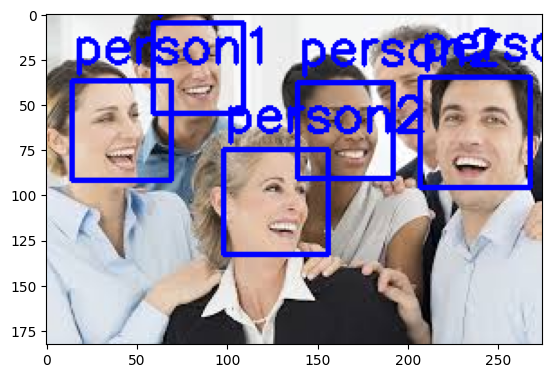

In [8]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [9]:
!pip install tensorflow==2.12.0


Image loaded successfully.


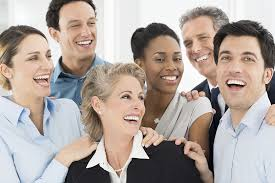

1/1 [==============================] - 1s 586ms/step


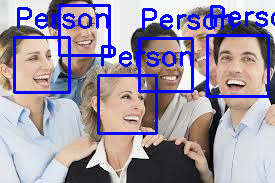

In [10]:
import numpy as np
import cv2
import os
import urllib.request
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image as keras_image
from google.colab.patches import cv2_imshow

# Load pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# Function to extract faces
def extract_face(image, required_size=(224, 224)):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    face_images = []
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        face = cv2.resize(face, required_size)
        face_images.append(face)
    return face_images, faces

# Function to get face embedding
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    face_pixels = preprocess_input(face_pixels)  # Adjust preprocessing
    samples = np.expand_dims(face_pixels, axis=0)
    yhat = model.predict(samples)
    return yhat[0]

# Function to recognize faces
def recognize_faces(model, image):
    faces, coordinates = extract_face(image)
    for i, face in enumerate(faces):
        embedding = get_embedding(model, face)
        # Dummy comparison - in practice, compare with a database of known embeddings
        name = "Person"  # Dummy name
        (x, y, w, h) = coordinates[i]
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image, name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return image

# Load and process the image
image_path = '/content/PEOPLES IMAGE.jpeg'
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not loaded correctly. Check the file path.")
else:
    print("Image loaded successfully.")
    cv2_imshow(image)  # Display the loaded image

    # Recognize faces
    result_image = recognize_faces(model, image)

    # Display the result
    cv2_imshow(result_image)
